# semseg/train

based on [camvid.ipynb](./camvid.ipynb).

In [9]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import torch
from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
from roofAI.semseg.train import SemSegModelTrainer
from roofAI.semseg import Profile
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
abcli-7.2362.1-unknown, built on 09 October 2023, 18:17:12


In [10]:
profile = Profile.QUICK # FULL, QUICK, VALIDATION
dataset_object = "roofAI-CamVid-v2"
model_object = objects.unique_object("roofAI-CamVid-semseg-model")

📂 roofAI-CamVid-semseg-model-2023-10-09-18-17-13-17930


SemSegModelTrainer: /Users/kamangir/storage/abcli/roofAI-CamVid-v2/SegNet-Tutorial/CamVid/ -Profile.QUICK-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403
data review


Dataset: 20 item(s).


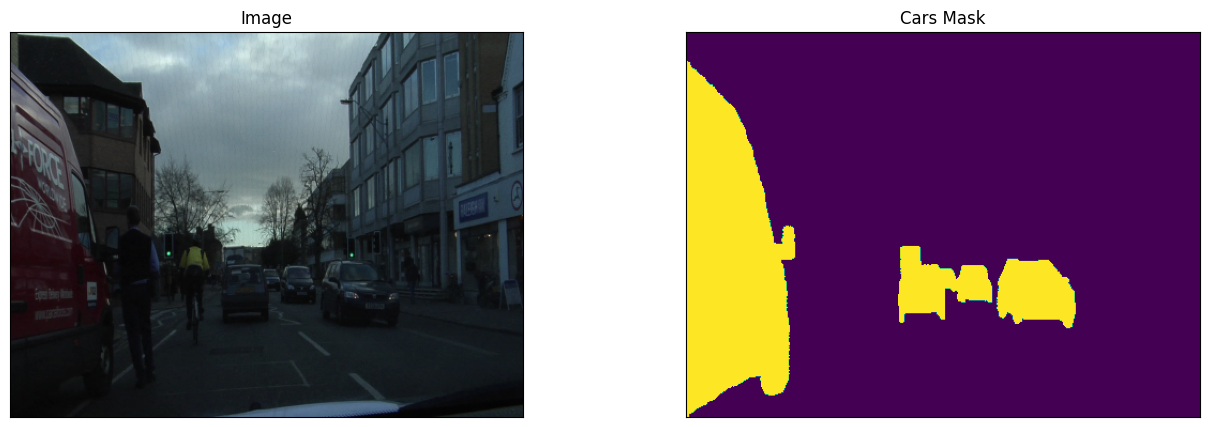

Dataset: 20 item(s).


/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:231: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/alb

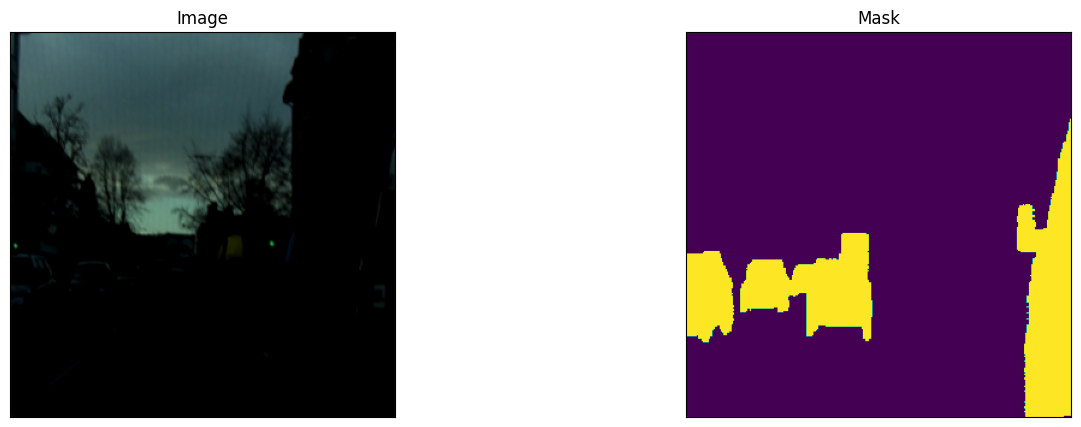

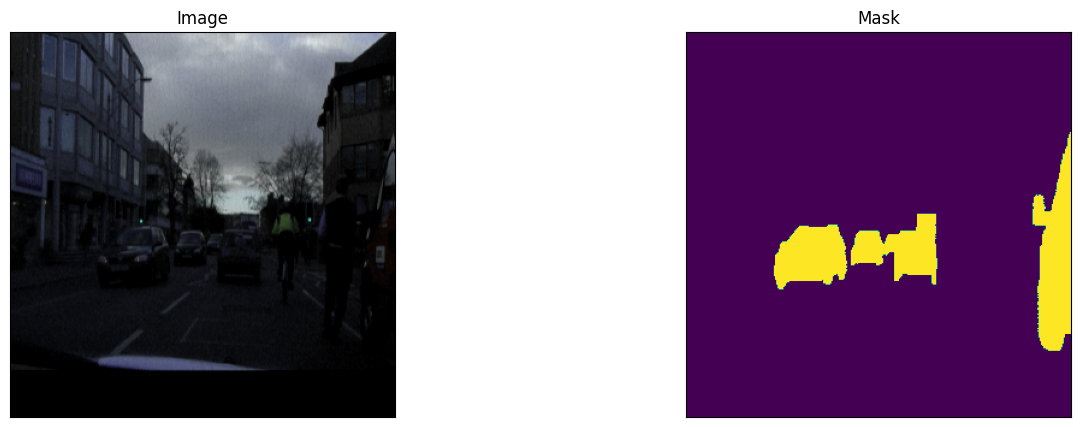

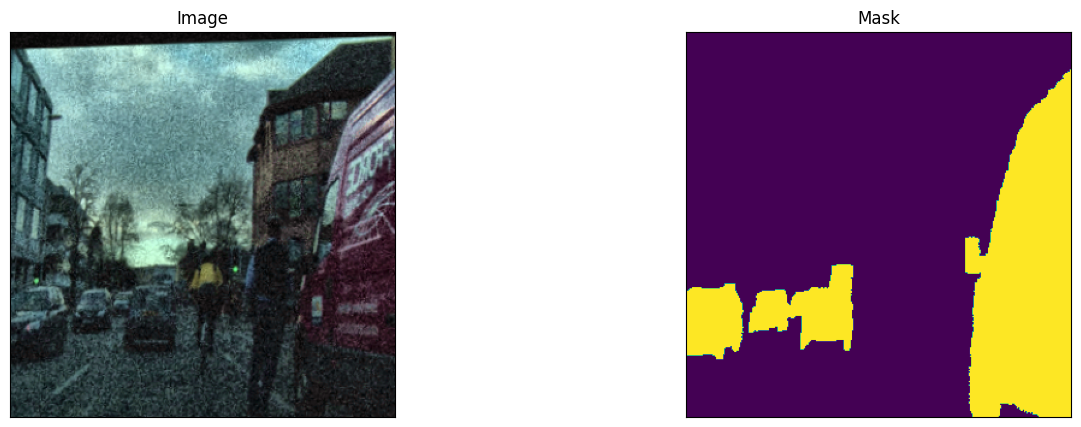

In [3]:
trainer = SemSegModelTrainer(
    dataset_path=objects.path_of(
        "SegNet-Tutorial/CamVid/", 
        object_name=dataset_object
    ),
    model_path=objects.object_path(object_name=model_object),
    in_notebook=True,
    profile=profile,
)

In [4]:
model = trainer.train()

SemSegModelTrainer.train -cpu:sigmoid-> se_resnext50_32x4d[imagenet]: car
epoch: #1/10


Dataset: 20 item(s).
Dataset: 20 item(s).
valid: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s, dice_loss - 0.9108, iou_score - 0.06966]


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403/model.pth
epoch: #2/10


valid: 100%|██████████| 20/20 [00:18<00:00,  1.11it/s, dice_loss - 0.7916, iou_score - 0.1732]


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403/model.pth
epoch: #3/10


valid: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s, dice_loss - 0.6735, iou_score - 0.2459]  


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403/model.pth
epoch: #4/10


valid: 100%|██████████| 20/20 [00:15<00:00,  1.25it/s, dice_loss - 0.6593, iou_score - 0.2702]  


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403/model.pth
epoch: #5/10


valid: 100%|██████████| 20/20 [00:15<00:00,  1.27it/s, dice_loss - 0.652, iou_score - 0.2852]   


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403/model.pth
epoch: #6/10


valid: 100%|██████████| 20/20 [00:15<00:00,  1.26it/s, dice_loss - 0.6459, iou_score - 0.2842] 

epoch: #7/10



valid: 100%|██████████| 20/20 [00:15<00:00,  1.25it/s, dice_loss - 0.6227, iou_score - 0.3086]  


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403/model.pth
epoch: #8/10


valid: 100%|██████████| 20/20 [00:16<00:00,  1.19it/s, dice_loss - 0.631, iou_score - 0.32]     


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403/model.pth
epoch: #9/10


valid: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s, dice_loss - 0.6629, iou_score - 0.2859]  

epoch: #10/10



valid: 100%|██████████| 20/20 [00:15<00:00,  1.28it/s, dice_loss - 0.6965, iou_score - 0.2493]  

SemSegModel.load(/Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403/model.pth)
SemSegModel: sigmoid-se_resnext50_32x4d[imagenet]: car



Dataset: 20 item(s).
valid: 100%|██████████| 20/20 [00:16<00:00,  1.24it/s, dice_loss - 0.5481, iou_score - 0.4175]


In [11]:
%%bash -s $profile $model_object
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

profile=$1
model_object=$2

abcli select $model_object
abcli tag set . built_by_notebook

[[ "$profile" != VALIDATION ]] && abcli upload

📂 abcli: roofAI-CamVid-semseg-model-2023-10-09-18-17-13-17930


roofAI-CamVid-semseg-model-2023-10-09-18-17-13-17930 += #built_by_notebook.


confirmed: roofAI-CamVid-semseg-model-2023-10-09-18-17-13-17930 does not exist.
roofAI-CamVid-semseg-model-2023-10-09-18-17-13-17930 open upload started.
upload: ./abcli.log to s3://kamangir/bolt/roofAI-CamVid-semseg-model-2023-10-09-18-17-13-17930/abcli.log


roofAI-CamVid-semseg-model-2023-10-09-18-17-13-17930 += #open.


In [12]:
seed.log(
    "download_object",
    object_name=model_object)

abcli select roofAI-CamVid-semseg-model-2023-10-09-18-17-13-17930
abcli download
open .


In [13]:
# END